### **Installing the Chemaxon Python module**

Install guide: https://docs.chemaxon.com/display/docs/python-api_installation.md

In [11]:
import sys

!{sys.executable} -m pip install chemaxon

<module 'chemaxon' from '/home/lnagy/IdeaProjects/python-api/chemaxon/src/chemaxon/__init__.py'>

### **Version numbers and build date**

In [12]:
import chemaxon

print('Version:       ', chemaxon.__version__)
print('CCL version:   ', chemaxon.ccl_version())
print('CCL build date:', chemaxon.ccl_build_date())

Version:        0.1.0
CCL version:    25.3.5
CCL build date: 2025-11-20


### **Checking the details of the installed Python API license**

In [13]:
[lic for lic in chemaxon.licenses() if lic['product'] == 'Python API']

[{'product': 'Python API',
  'expiration': '2026-02-17',
  'licensee': 'Chemaxon (Autogenerated) - lnagy@chemaxon.com',
  'state': 'VALID'}]

### **Molecule import / export**

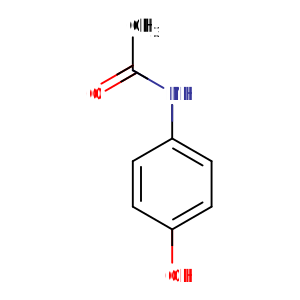

In [4]:
from chemaxon import import_mol, export_mol
mol = import_mol('CC(=O)NC1=CC=C(O)C=C1')
mol

In [5]:
print(export_mol(mol, 'smiles:u'))

CC(=O)Nc1ccc(O)cc1


In [6]:
print(export_mol(mol, 'smiles:+H'))

[H]OC1=C([H])C([H])=C(N([H])C(=O)C([H])([H])[H])C([H])=C1[H]


In [7]:
print(export_mol(mol, 'mol'))


  Mrv2501 05282522412D            

 11 11  0  0  0  0            999 V2000
    0.0000    3.3000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    2.4750    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7145    2.0625    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7145    2.0625    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.7145    1.2375    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4289    0.8250    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4289   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7145   -0.4125    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7145   -1.2375    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.8250    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  2  0  0  0  0
  2  4  1  0  0  0  0
  4  5  1  0  0  0  0
  5  6  2  0  0  0  0
  6  7  1  0  0  0  0
  7  8  2  0  0  0  0

### **Reading multiple molecules from file**

In [2]:
from chemaxon import open_for_import

with open_for_import('nci1000.smiles') as mol_iterator:
    mols = list(mol_iterator)

len(mols)

1000

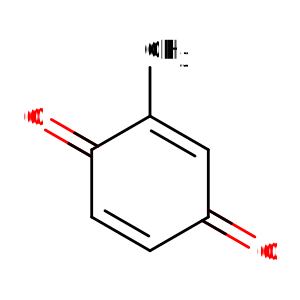

In [9]:
mols[0]

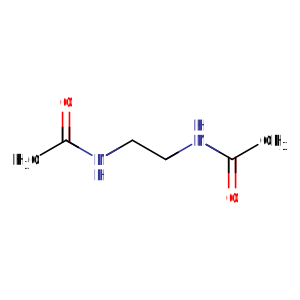

In [10]:
mols[598]

In [10]:
from chemaxon import open_for_export, open_for_import

with open_for_export('nci1000.mrv', 'mrv') as exporter:
    export_res = all(exporter.write(m) for m in mols)

# test exported file:
with open_for_import('nci1000.mrv') as importer:
    mol_reimp = list(importer)

len(mol_reimp)

1000

### **Type checking of function parameters**

In [ ]:
from chemaxon import import_mol

import_mol('c1ccccc1', True) # erroneous parametrization raises TypeError

### **Molecule property handling**

You can store custom properties in the __Molecule__ objects using the __set_property__ and __get_property__ methods. A dictionary of the __Molecule__ object's properties can also be reteived using the __get_properties_dict__ method.

_**Note:** Modifying that dictionary will not change the properties of the __Molecule__ object. For that, you should use __set_property__ method._

Supported property value types are: __str__, __int__, __float__, __bool__, __list__ (of int, float). Considering the list of scalar values, the api is aligned to the behavior of Chemaxon Java API. So, double values can only be used with dots, not with commas.

#### Reading properties:

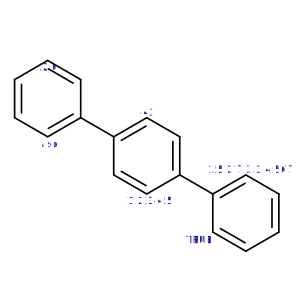

In [27]:
from chemaxon import open_for_import

with open_for_import('mol_with_properties.mrv') as mol_iterator:
    mols = list(mol_iterator)

mols[0]

In [28]:
from chemaxon import open_for_import

with open_for_import('mol_with_properties.mrv') as mol_iterator:
    mols = list(mol_iterator)

mol = mols[0]

print("Number of properties: " + str(len(mol.properties)))
print("\ttest_str_property -> " + mol.get_property("test_str_property"))
print("\ttest_double_property -> " + str(mol.get_property("test_double_property")))
print("\ttest_int_property -> " + str(mol.get_property("test_int_property")))
print("\ttest_boolean_property -> " + str(mol.get_property("test_boolean_property")))
print("\ttest_int_array_property -> " + str(mol.get_property("test_int_array_property")))
print("\ttest_double_array_property -> " + str(mol.get_property("test_double_array_property")))

Number of properties: 6
	test_str_property -> asd
	test_double_property -> 4.2
	test_int_property -> 42
	test_boolean_property -> True
	test_int_array_property -> [1, 2, 3, 4, 5]
	test_double_array_property -> [1.2, 3.4, 5.22, 6.7889]
